## Imports:

In [31]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Importerer data:

In [32]:
df = pd.read_csv("../data/processed_data/train.csv")

# lager korelasjons matrise:

In [27]:
numeric_df = df.select_dtypes(include="number")
correlation_matrix = numeric_df.corr()

fig = px.imshow(correlation_matrix,
                labels=dict(x="Features", y="Features", color="Correlation"),
                x=correlation_matrix.columns,
                y=correlation_matrix.columns,
                color_continuous_scale='RdBu_r',
                aspect="auto")

# Update layout to ensure all y-axis labels are shown
fig.update_layout(
    yaxis=dict(
        tickmode='linear',  # Ensure all y-axis ticks are included
        tick0=0,            # Starting tick
        dtick=1             # Step size for ticks (1 ensures every category gets a label)
    ),xaxis=dict(
        tickmode='linear',  # Ensure all x-axis ticks are included
        tick0=0,            # Starting tick
        dtick=1             # Step size for ticks (1 ensures every category gets a label)
    ),
    autosize=False,  # Disable automatic size adjustment
    height=800,     # Set the height to ensure enough space for labels
    width=800       # Adjust width if necessary
)

fig.show()

# Fligth count inspection:

<Axes: >

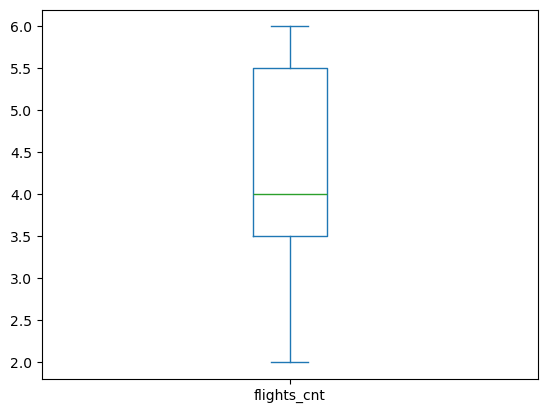

In [28]:
df["flights_cnt"].plot.box()

<Axes: >

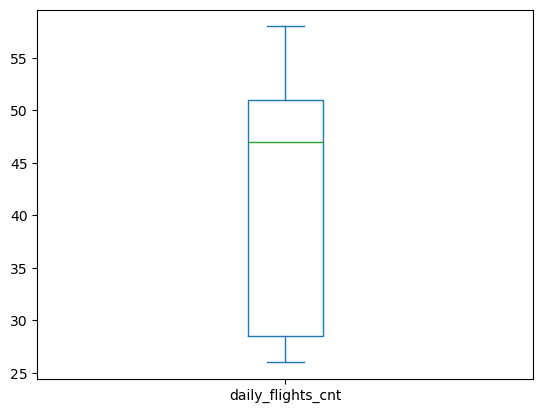

In [29]:
df["daily_flights_cnt"].plot.box()

Number of flights v target:

In [30]:
import plotly.graph_objects as go

target_avg = df.groupby("flights_cnt")[["target_actual","target_sched"]].mean().round(2)

fig = go.Figure()

# Add each column as its own bar trace
for col in target_avg.columns:
    fig.add_trace(
        go.Bar(
            x=target_avg.index,
            y=target_avg[col],
            name=col,
            text=target_avg[col],
            textposition='auto'
        )
    )

fig.update_layout(
    title="Average target value per flightcount",
    xaxis_title="flightcount",
    yaxis_title="Average of target",
    barmode='group'  # or 'stack'
)

fig.show()
